<a href="https://colab.research.google.com/github/KrishO9/SatelliteImageryCode/blob/main/SatelliteImagery_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install patchify

In [3]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from matplotlib import pyplot as plt
import random

In [4]:
minmaxscaler = MinMaxScaler()

In [5]:
!ls -lah '/content/drive/MyDrive/Semantic-segmentation-dataset-1/Semantic segmentation dataset'

total 33K
-rw------- 1 root root  548 Jul 22 11:41  classes.json
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 1'
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 2'
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 3'
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 4'
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 5'
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 6'
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 7'
drwx------ 4 root root 4.0K Jul 22 11:46 'Tile 8'


In [6]:
dataset_root_folder = '/content/drive/MyDrive/Semantic-segmentation-dataset-1'

In [7]:
dataset_name = 'Semantic segmentation dataset'

In [8]:
for path , subdirs , files in os.walk(os.path.join(dataset_root_folder , dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
 # print(dir_name)
  if dir_name == 'masks':
    masks = os.listdir(path)
    #print(images)
    for i , mask_name in enumerate(masks):
      if(mask_name.endswith('.png')):
        print(mask_name)

image_part_003.png
image_part_001.png
image_part_004.png
image_part_006.png
image_part_005.png
image_part_009.png
image_part_008.png
image_part_007.png
image_part_002.png
image_part_001.png
image_part_007.png
image_part_004.png
image_part_003.png
image_part_006.png
image_part_005.png
image_part_009.png
image_part_002.png
image_part_008.png
image_part_008.png
image_part_004.png
image_part_002.png
image_part_003.png
image_part_007.png
image_part_006.png
image_part_009.png
image_part_005.png
image_part_001.png
image_part_005.png
image_part_003.png
image_part_007.png
image_part_001.png
image_part_008.png
image_part_004.png
image_part_009.png
image_part_006.png
image_part_002.png
image_part_002.png
image_part_001.png
image_part_008.png
image_part_005.png
image_part_003.png
image_part_004.png
image_part_007.png
image_part_006.png
image_part_009.png
image_part_001.png
image_part_002.png
image_part_005.png
image_part_006.png
image_part_007.png
image_part_004.png
image_part_008.png
image_part_0

In [9]:
image_patch_size = 256

In [10]:
img = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)

In [11]:
image_patches = patchify(img , (image_patch_size , image_patch_size , 3) , step = image_patch_size)

In [12]:
len(image_patches)
print(image_patches.shape)

(2, 3, 1, 256, 256, 3)


In [13]:
image_x = image_patches[0,0,:,:]
#MinmaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,image_x.shape[-1])).reshape(image_x.shape)

In [14]:
image_y[0].shape

(256, 256, 3)

In [15]:
(img.shape[0]//image_patch_size)*image_patch_size

512

In [16]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)



In [17]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [18]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [19]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [20]:
type(image_dataset[0])

numpy.ndarray

140


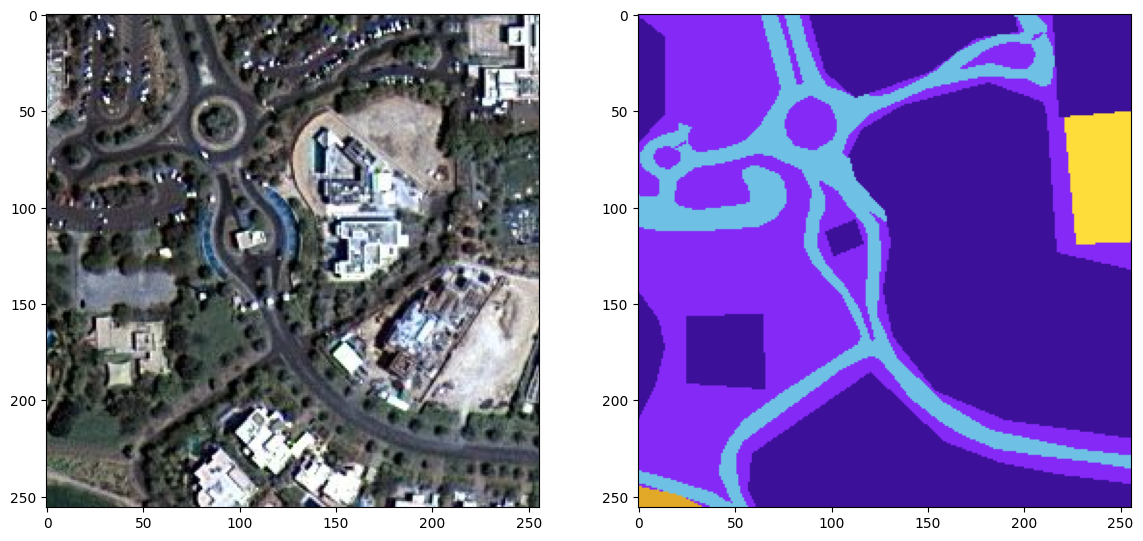

In [21]:
random_index = random.randint(0,len(image_dataset))
print(random_index)
plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_index])
plt.subplot(122)
plt.imshow(mask_dataset[random_index])

**Processing Mask Labels**

In [22]:
class_building = "#3C1098"
class_building = class_building.strip('#')
class_building = np.array(tuple(int(class_building[i:i+2] , 16) for i in (0,2,4)))
print(class_building)
class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [23]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  print(label_segment)
  return label_segment

In [24]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

Streaming output truncated to the last 5000 lines.
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[5 5 5 ... 1 1 1]
 [5 5 5 ... 1 1 1]
 [5 5 5 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
[[0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 

In [25]:
len(labels)

945

In [26]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
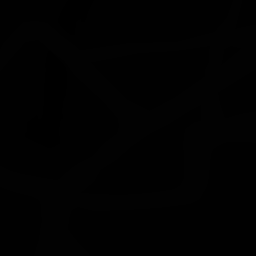

In [27]:
labels[3]

In [28]:
labels = np.expand_dims(labels, axis=3)
labels

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]]],


       [[[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [5],
         [5],
         ...,
         [0],
         [0],
         [0]],

        [[1],
         [1],
         [5],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [2],


In [29]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [30]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


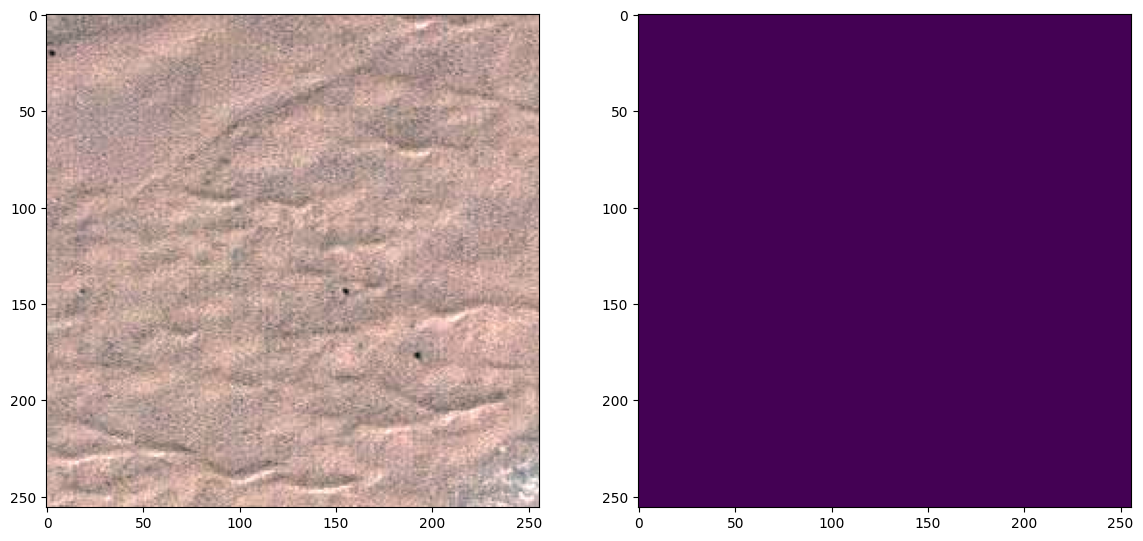

In [31]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
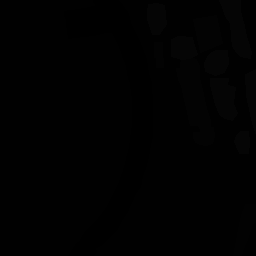

In [32]:
labels[0][:,:,0]

In [33]:
total_classes = len(np.unique(labels))
total_classes

6

In [34]:
from tensorflow.keras.utils import to_categorical
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [35]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [36]:
master_trianing_dataset = image_dataset

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [39]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [40]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


# **Deep Learning Part**

In [41]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [42]:
!pip install -U segmentation-models

In [43]:
import segmentation_models as sm

print(f"Segmentation Models Version: {sm.__version__}")

Segmentation Models: using `tf.keras` framework.
Segmentation Models Version: 1.0.1


In [44]:
from keras.models import Model
from keras.layers import Input , Conv2D , MaxPooling2D , UpSampling2D , Conv2DTranspose
from keras.layers import concatenate , Dropout , BatchNormalization , Lambda

In [45]:
from keras import backend as K

In [46]:
def jaccard_coef(y_pred , y_true):
  y_pred_flatten = K.flatten(y_pred)
  y_true_flatten = K.flatten(y_true)
  intersection = K.sum(y_true_flatten * y_pred_flatten)
  union = K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection
  final_coef = (intersection + 1.0) / (union+ 1.0)
  return final_coef

# U-Net Model Architechture
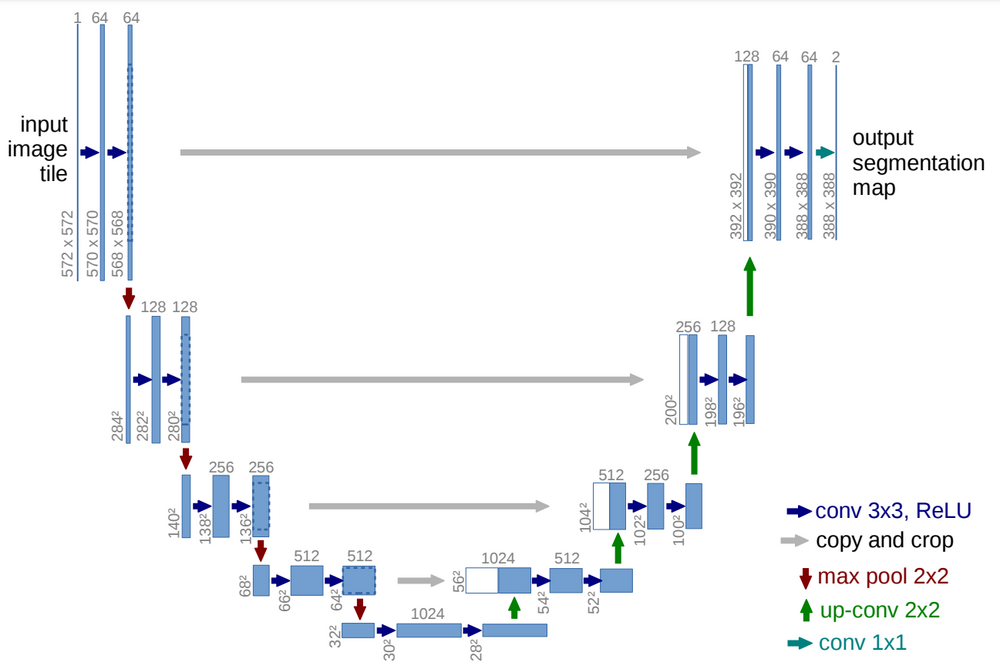

In [47]:
def multi_unet_model(n_classes=5, image_height = 256 , image_width=256 , image_channels = 1):
  inputs = Input((image_height , image_width , image_channels))
  source_input = inputs

  c1 = Conv2D(16, (3,3) , activation = 'relu' , kernel_initializer = 'he_normal' , padding = 'same')(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3) , activation = 'relu' , kernel_initializer = 'he_normal' , padding = 'same')(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3) , activation = 'relu' , kernel_initializer = 'he_normal' , padding = 'same')(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3) , activation = 'relu' , kernel_initializer = 'he_normal' , padding = 'same')(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3) , activation = 'relu' , kernel_initializer = 'he_normal' , padding = 'same')(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3) , activation = 'relu' , kernel_initializer = 'he_normal' , padding = 'same')(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128 , (2,2) , strides=(2,2) , padding='same')(c5)
  u6 = concatenate([u6 , c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes , (1,1) , activation='softmax')(c9)

  model = Model(inputs=[inputs] , outputs=[outputs])

  return model

In [48]:
metrics = ["accuracy",jaccard_coef]

In [49]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [50]:
model = get_deep_learning_model()

In [51]:
model.get_config()

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

# Loss Function : Focal Loss (Cross Entropy Loss extension)

In [52]:
weights = [0.166,0.166,0.166,0.166,0.166,0.166]

In [53]:
import segmentation_models as sm

In [54]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [55]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [56]:
total_loss = dice_loss + (1 * focal_loss)

In [57]:
import tensorflow as tf

In [58]:
tf.keras.backend.clear_session()

In [59]:
model.compile(optimizer='adam' , loss=total_loss , metrics=metrics)

In [60]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

In [61]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=15,
                          validation_data=(X_test, y_test),
                          shuffle=False)

Epoch 1/15
51/51 [==============================] - 53s 364ms/step - loss: 1.0037 - accuracy: 0.5413 - jaccard_coef: 0.2590 - val_loss: 0.9926 - val_accuracy: 0.6383 - val_jaccard_coef: 0.3309
Epoch 2/15
51/51 [==============================] - 11s 211ms/step - loss: 0.9792 - accuracy: 0.6804 - jaccard_coef: 0.3772 - val_loss: 0.9738 - val_accuracy: 0.6665 - val_jaccard_coef: 0.4582
Epoch 3/15
51/51 [==============================] - 11s 215ms/step - loss: 0.9688 - accuracy: 0.6995 - jaccard_coef: 0.4260 - val_loss: 0.9642 - val_accuracy: 0.7092 - val_jaccard_coef: 0.4717
Epoch 4/15
51/51 [==============================] - 11s 220ms/step - loss: 0.9613 - accuracy: 0.7166 - jaccard_coef: 0.4598 - val_loss: 0.9610 - val_accuracy: 0.7250 - val_jaccard_coef: 0.5030
Epoch 5/15
51/51 [==============================] - 11s 219ms/step - loss: 0.9541 - accuracy: 0.7416 - jaccard_coef: 0.4999 - val_loss: 0.9627 - val_accuracy: 0.7191 - val_jaccard_coef: 0.5094
Epoch 6/15
51/51 [=================

In [62]:
history_a = model_history

In [63]:
history_a.history

{'loss': [1.003660798072815,
  0.9791601300239563,
  0.9688118696212769,
  0.9612838625907898,
  0.9540950059890747,
  0.9474046230316162,
  0.9420902729034424,
  0.9381937384605408,
  0.9321992993354797,
  0.9292718768119812,
  0.9261980056762695,
  0.9254534840583801,
  0.9227192401885986,
  0.9225531220436096,
  0.9220089316368103],
 'accuracy': [0.5413022041320801,
  0.6804080009460449,
  0.6995480060577393,
  0.7165700793266296,
  0.7415978312492371,
  0.7615694403648376,
  0.7762306928634644,
  0.7868107557296753,
  0.8048998713493347,
  0.8127537369728088,
  0.8204521536827087,
  0.8222744464874268,
  0.8297837972640991,
  0.8298615217208862,
  0.8322843313217163],
 'jaccard_coef': [0.2589980363845825,
  0.37715935707092285,
  0.42601361870765686,
  0.45977097749710083,
  0.49986761808395386,
  0.5290850400924683,
  0.5583987236022949,
  0.5781305432319641,
  0.6091260313987732,
  0.6222502589225769,
  0.6383365392684937,
  0.6403168439865112,
  0.653381884098053,
  0.6539612412

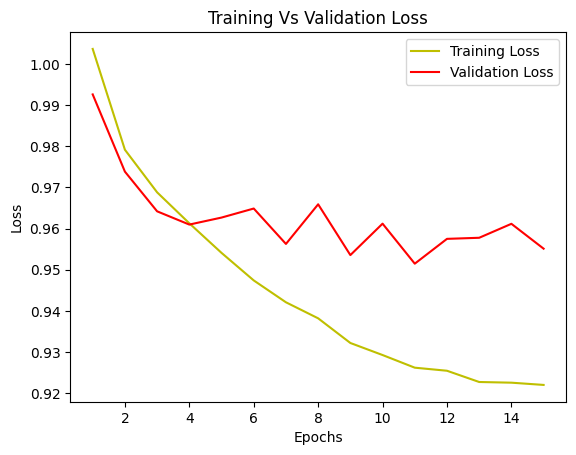

In [64]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

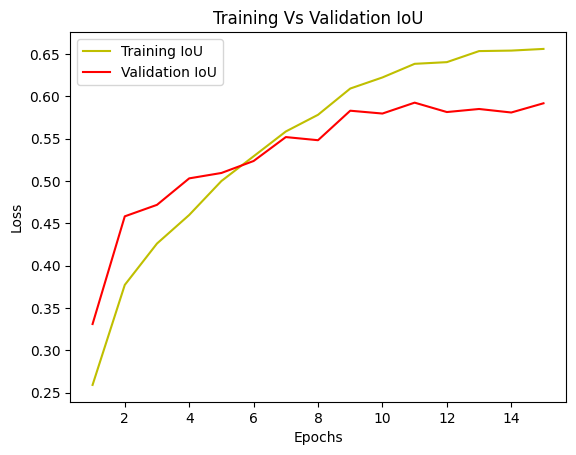

In [65]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [66]:
model_history.params


{'verbose': 1, 'epochs': 15, 'steps': 51}

In [67]:

y_pred = model.predict(X_test)

5/5 [==============================] - 5s 57ms/step


In [68]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [72]:
y_test_argmax = np.argmax(y_test, axis=3)

In [69]:
import random

In [73]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]


1/1 [==============================] - 1s 1s/step


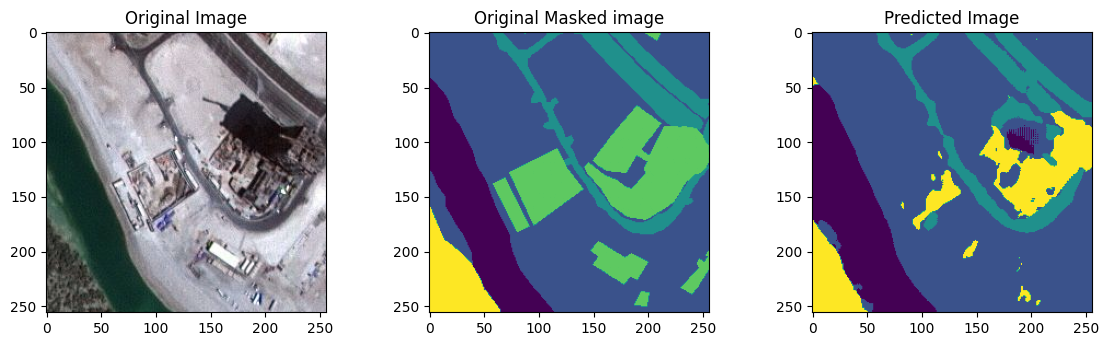

In [74]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


In [75]:
model.save("satellite_segmentation.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
from keras.utils import plot_model

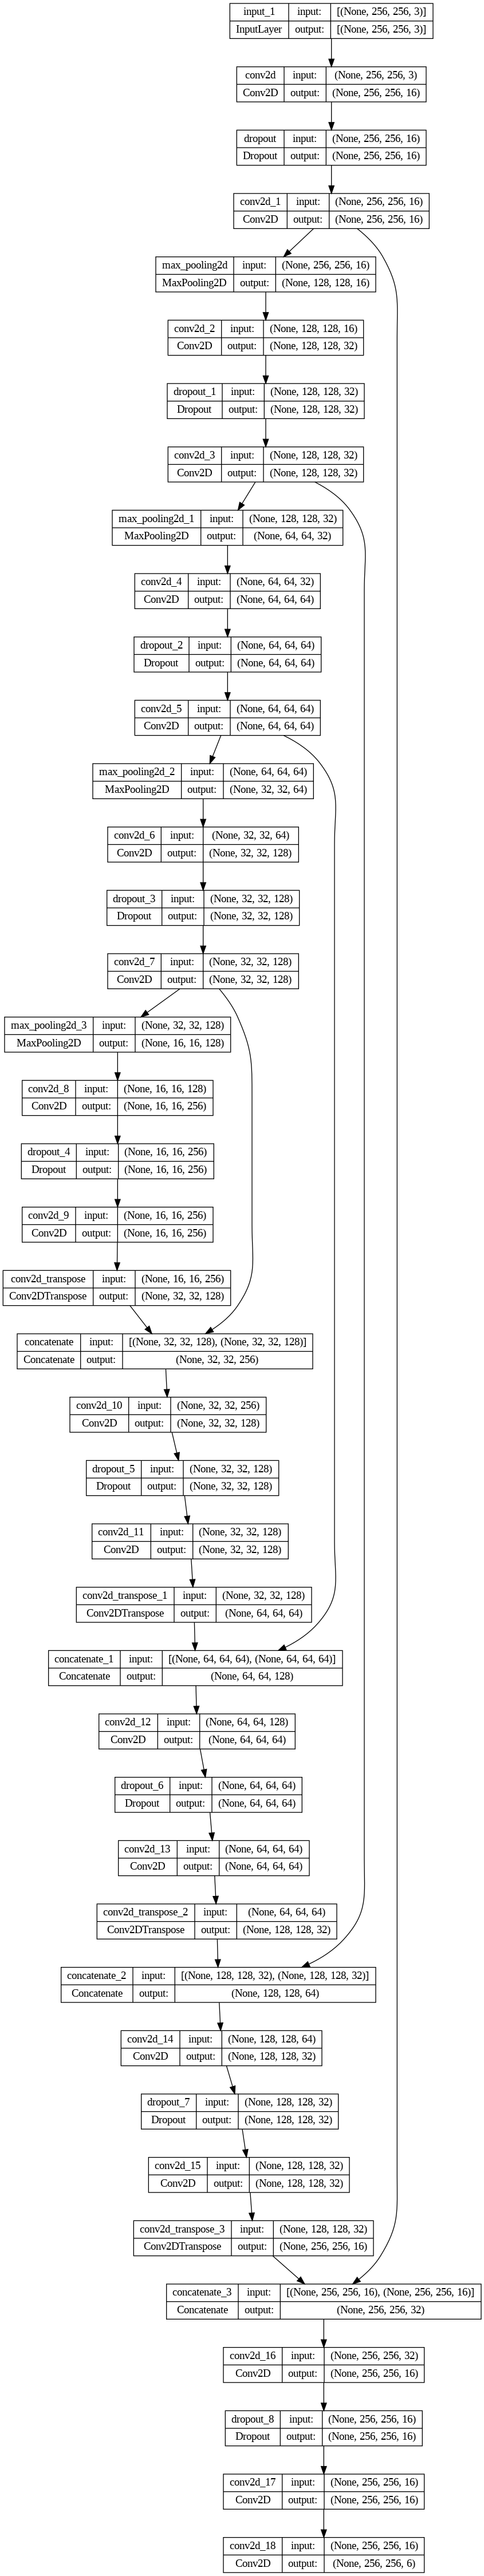

In [78]:
plot_model(model , to_file="model_architechture.png" , show_shapes=True , show_layer_names=True)